In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
data = open('three_kind_andMark/G_in/first_non.csv', encoding = 'utf-8')
df = pd.read_csv(data, skiprows = 0)
print('data size:', df.shape)
df.head()

data size: (1314, 6)


,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,1.2,36.0,0.0,1.0
1,15-10002,0,19.1,79.0,32.9,2.0
2,15-10003,1,21.8,106.0,9.7,1.0
3,15-10004,0,177.7,699.0,7.1,1.0
4,15-10005,1,138.2,41437.0,8.5,1.0


### 处理数据进入CCA

In [36]:
data1 = open('cleaned_data/G-ex/thir_non_excludeG_Cleaned.csv', encoding = 'utf-8')
df1 = pd.read_csv(data1, skiprows  = 0)
df1.head()

,ID,X,H-12,P-01,C-01,C-04
0,2015-10001,1,-1.367002,0.607626,0.232064,-3.350424
1,2015-10002,2,0.185376,-0.313470,-0.764231,0.969424
2,2015-10003,0,0.084758,-0.681908,-0.051286,1.022105
3,2015-10004,1,-0.504570,0.515517,-0.362057,-0.084198
4,2015-10005,2,-0.619561,-0.313470,-0.288934,0.126527


In [37]:
#按照X进行排序  处理进入CCA之前的数据
a = df1.sort_values(by = 'X')
a.head()

,ID,X,H-12,P-01,C-01,C-04
3605,2016-11591,0,0.717209,-1.510894,0.387450,1.443553
4148,2016-12134,0,-0.303336,0.883955,0.442291,-0.848073
4145,2016-12131,0,-0.260214,-0.129251,-0.691109,0.706018
4140,2016-12126,0,1.938988,0.239188,0.634238,-1.928035
4137,2016-12123,0,-0.188345,0.054969,-0.160970,-1.322203


In [38]:
#保存数据
a.to_csv('cleaned_data/CCA/thir_non_excludeG_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

In [39]:
#输出各个类别的数量
import os
filenames = os.listdir('cleaned_data/G-ex')
for filename in filenames:
    data1 = open('cleaned_data/G-ex' + filename, encoding = 'utf-8')
    df1 = pd.read_csv(data1, skiprows  = 0)
    

['thir_non_excludeG_Cleaned.csv',
 'secon_non_excludeG_Cleaned.csv',
 'first_chan_excludeG_Cleaned.csv',
 'thir_chan_excludeG_Cleaned.csv',
 'secon_chan_excludeG_Cleaned.csv',
 'first_non_excludeG_Cleaned.csv']

ID：病例编号
X：分类目标
其余特征表示一线标志物

# 数据的直观分布

## 数据构成比例

### 时间与患病数

In [22]:
df['Year'] = df['ID']. apply(lambda row : row.split('-')[0] )
a = df[['Year', 'X', 'ID']].groupby(['X']).count()
a

NameError: name 'df' is not defined

In [23]:
plt.style.use('seaborn')

In [24]:
b = a.unstack()
b
(b.T).plot(kind = 'pie', subplots = True)

TypeError: '<' not supported between instances of 'str' and 'int'

## 特征的分布规律

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba8d550>,
      dtype=object)

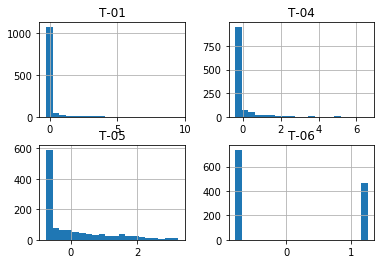

In [19]:
#复制除编号以及病状的所有特征
features = [x for x in df.columns if x not in['ID', 'X'] ]
plt.figure()
ax = plt.subplot(111)
df.hist(column = features, bins = 20, ax = ax)

正相关的特征分布

In [ ]:
df.hist(column = ['','',''], bins = 20)

负相关的特征分布

In [ ]:
df.hist(column = ['','',''], bins = 20)

## 数据的正态化变换



T-01和T-04两个特征的分布图不符合正态性

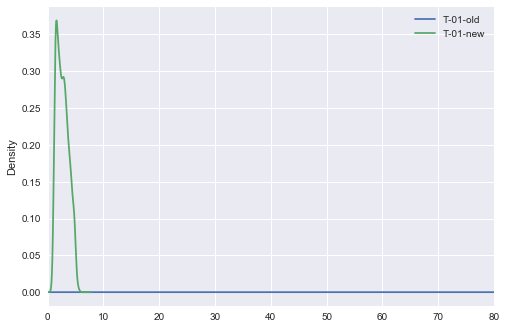

In [38]:
df['T-04'].plot(kind = 'kde', xlim = [0,80], label = 'T-04-old')

np.log10(df['T-04']).plot(kind = 'kde', xlim = [0,80], label = 'T-04-new')
plt.legend()

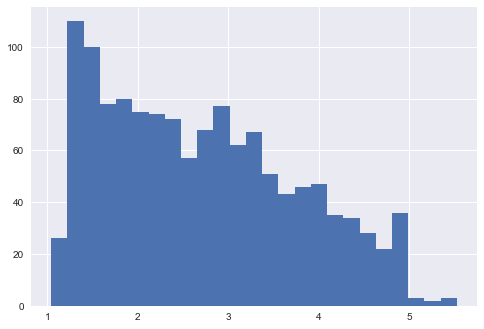

In [44]:
np.log10(df['T-04']).hist(bins = 25)

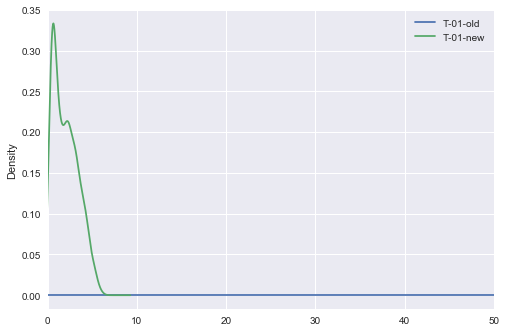

In [46]:
df['T-01'].plot(kind = 'kde', xlim = [0,50], label = 'T-01-old')

np.log10(df['T-01']).plot(kind = 'kde', xlim = [0,50], label = 'T-01-new')
plt.legend()

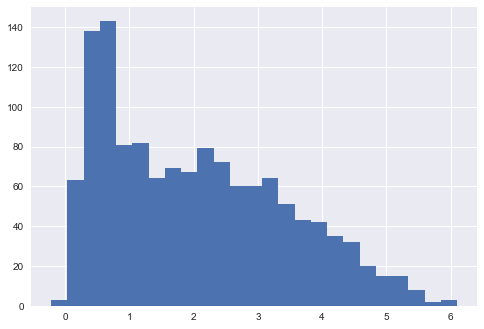

In [47]:
np.log10(df['T-01']).hist(bins = 25)

# 数据的浓缩

五数概括法：  
最小值、最大值、中位数、上四分位数、下四分位数

In [48]:
print('数据的概况总览')
df.describe()

数据的概况总览


,X,T-01,T-04,T-05,T-06
count,1314.000000,1.311000e+03,1296.000000,1289.000000,1289.000000
mean,0.694064,1.011573e+04,7102.325617,13.467029,1.411947
std,0.814479,5.796223e+04,21964.142833,17.657283,0.492377
min,0.000000,6.050000e-01,11.000000,0.000000,1.000000
25%,0.000000,5.800000e+00,61.000000,0.000000,1.000000
50%,0.000000,7.080000e+01,397.500000,4.800000,1.000000
75%,1.000000,1.193500e+03,2865.000000,22.400000,2.000000
max,2.000000,1.261300e+06,336821.000000,82.700000,2.000000


## 样本的矩


1阶原点矩——数学期望、均值  
2阶中心矩——方差  
3阶中心矩——偏度系数  
4阶中心矩——峰度系数

In [49]:
df['T-05'].describe()

count    1289.000000
mean       13.467029
std        17.657283
min         0.000000
25%         0.000000
50%         4.800000
75%        22.400000
max        82.700000
Name: T-05, dtype: float64

In [50]:
print('以特征T-05为例：')
print('均值 = ', df['T-05'].mean())
print('方差 = ', df['T-05'].var())
print('偏度 = ', df['T-05'].skew())
print('峰度 = ', df['T-05'].kurt())

以特征T-05为例：
均值 =  13.467028704422036
方差 =  311.7796496272793
偏度 =  1.3496123027782139
峰度 =  0.9786418187416666


## 箱型图和异常值

In [51]:
import seaborn as sns

使用seaborn的箱线图展示

同样以T-05为例，看各分类的箱型图：


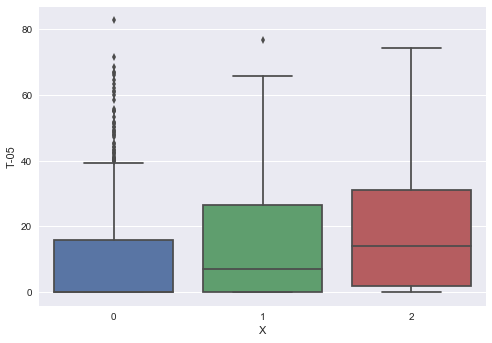

In [52]:
sns.boxplot(x = 'X', y = 'T-05', data = df)
print('同样以T-05为例，看各分类的箱型图：')

异常值分析：  
1) 大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距  
2) 3西格玛原则，数值分布在（μ—3σ,μ+3σ)中的概率为0.9974 

## 数据相关性

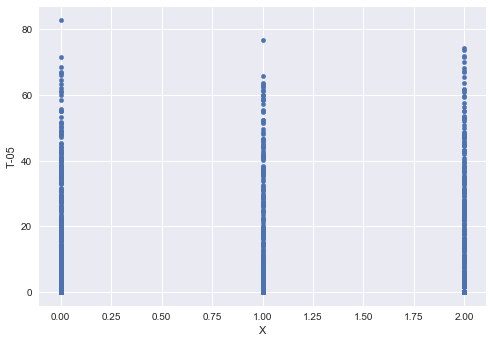

In [53]:
df[['X', 'T-05']].plot(x = 'X', y = 'T-05', kind = 'scatter')

患病和特征T-05不具有相关性

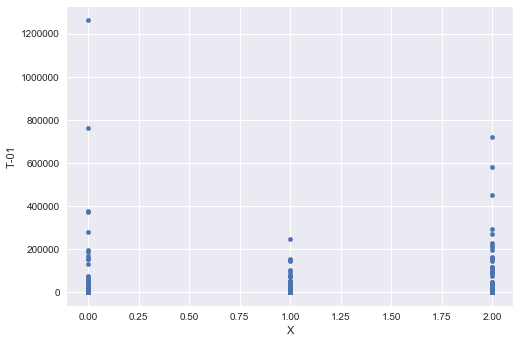

In [55]:
df[['X','T-01']].plot(x = 'X', y = 'T-01', kind = 'scatter')

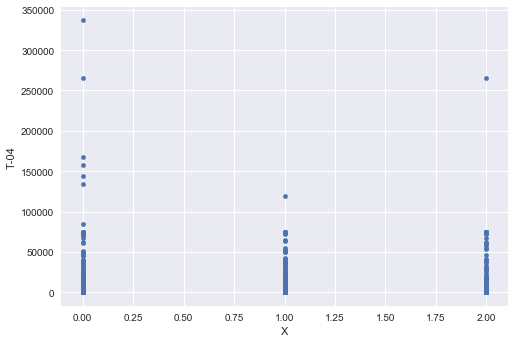

In [56]:
df[['X','T-04']].plot(x = 'X', y = 'T-04', kind = 'scatter')

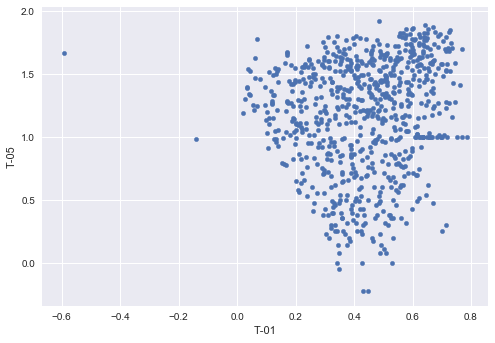

In [69]:
df[['T-01', 'T-05']].plot(x='T-01', y='T-05', c=df['X'], kind='scatter')
print('T-01和T-05线性无关')

T-01、T-04、T-05、T-06两两之间线性无关

## 相关系数矩阵

In [75]:
#def process(x):
#    if 0<= x <= 30:
#        return 0
#    elif 30< x < 60:
#        return 1
#    else:
#        return 2
#df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
#df['T-05-new']

皮尔逊相关系数：
    值域为[-1,1], 1表示完全正相关， -1表示完全负相关，0表示无关， 绝对值越大表明相关性越强

In [79]:
df.corr(method = 'spearman')

,X,T-01,T-04,T-05,T-06,T-05-new
X,1.000000,0.293995,0.254439,0.254713,0.225562,0.128580
T-01,0.293995,1.000000,0.327054,0.755613,0.604424,0.364222
T-04,0.254439,0.327054,1.000000,0.236672,0.218590,0.095494
T-05,0.254713,0.755613,0.236672,1.000000,0.882295,0.695064
T-06,0.225562,0.604424,0.218590,0.882295,1.000000,0.564166
T-05-new,0.128580,0.364222,0.095494,0.695064,0.564166,1.000000


In [26]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False) #得到性别与其他特征的相关系数  倒序

X       1.000000
T-06    0.230671
T-05    0.216245
T-04    0.083421
T-01    0.076934
Name: X, dtype: float64

# 预处理和降维

## 异常值的处理

### 缺失值处理

In [3]:
print("观察缺失值的比例，以决定采用填补还是丢弃")
df.isnull().describe()

观察缺失值的比例，以决定采用填补还是丢弃


,ID,X,T-01,T-04,T-05,T-06
count,1314,1314,1314,1314,1314,1314
unique,1,1,2,2,2,2
top,False,False,False,False,False,False
freq,1314,1314,1311,1296,1289,1289


这里直接删除包含缺失的样本  
实际应用中可能需要适合的fill none算法  

In [4]:
df.dropna(inplace = True) #数据清洗
print('剩余样本：', df.shape)

剩余样本： (1280, 6)


## 离群点处理

这里直接用3西格玛原则删除了异常的年龄  
实际应用中需要适合的outlier detect算法

3西格玛原则：|采样点与均值的差| > 3倍标准差 --》 则剔除
变形为：
     Xi< X - 3σ or  Xi > X + 3σ

In [5]:
cols = df.columns
for i in range(2,df.shape[1]):
    up_bound = df[cols[i]].mean() + 3*df[cols[i]].std()
    low_bound = df[cols[i]].mean() - 3*df[cols[i]].std()
    df = df[(df[cols[i]]<=up_bound) & (df[cols[i]]>=low_bound)]
    print("处理特征%s, 剩余样本：%d" % (cols[i],df.shape[0]))

处理特征T-01, 剩余样本：1264
处理特征T-04, 剩余样本：1231
处理特征T-05, 剩余样本：1218
处理特征T-06, 剩余样本：1218


In [4]:
df.isnull().describe()

,ID,X,T-01,T-04,T-05,T-06
count,1218,1218,1218,1218,1218,1218
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1218,1218,1218,1218,1218,1218


## 数据降维

### 主成分分析

#### to maximize Var(c1X1 + c2X2 + c3X3 + ...) 其中 c1^2 + c2^2 +....+ cp^2 = 1

PCA算法流程：  
1) 0均值化：将X的每一维数据分别减去其平均值，即 X=X-Mean（X）  
2) 协方差矩阵：协方差矩阵C可以描述m维属性之间的相关关系，即 C=(X'X)/m  
3) 数据降维：协方差矩阵C是m*m阶，选取的特征向量矩阵P是m*k阶。通过 Y=XP 即得到投影后的k维样本。

In [27]:
from sklearn.decomposition import PCA
# 直接调包实现了，手写也不复杂
features = [i for i in df.columns if i not in ['ID', 'X', 'Year']]  #feature中去除了 'ID', 'X', 'Year'
X, y = df[features], df['X']
#PCA算法所要保留下来的主成分个数
pca = PCA(n_components=4)
pca.fit(X)
#降维后 各主成分的方差值 
print(pca.explained_variance_ratio_)
#返回各主成分的方差百分比(贡献率)
print(pca.explained_variance_)

[0.47739617 0.25339973 0.22136738 0.04783672]
[1.90958266 1.01359787 0.88546858 0.19134667]


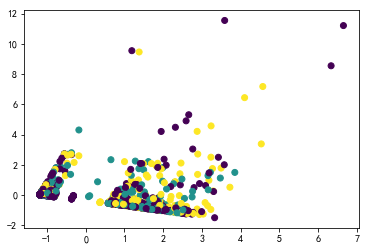

In [29]:
# n_component PCA算法中要保留的成分个数
pca = PCA(n_components=3)
#训练模型  用数据X来训练
pca.fit(X)
#返回降维后的数据
X_new = pca.transform(X)
#画出散点图
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, marker='o')  # y = 0 /1 /2
plt.show()

# 参数检测和方差分析

In [23]:
from scipy.stats.mstats import kruskalwallis
import scipy.stats as stats
import numpy as np
import scipy as sp

#啥叫显著性差异
# p>0.05 表示差异不显著
# 0.01 < p < 0.05 表示差异性显著
# p< 0.01 表示差异性极显著

#三组非正太分布数据检验
def Kruskawallis_test(list1, list2, list3):
    # Perform the Kruskal-Wallis test,返回True表示有显著差异，返回False表示无显著差异
    print("Use kruskawallis test:")
     
    h, p = kruskalwallis(list1, list2, list3)
    print("H value:",h)
    print("p value:",p)
      
    # Print the results
    if p<0.05:
        print('There is a significant difference.')
        return True
    else:
        print('No significant difference.')
        return False

#两组非正态分布数据检验   有关于统计学的知识
def Mannwhitneyu(group1, group2):   
    #以下处理sp版本问题 
    if np.int(sp.__version__.split('.')[1]) > 16:
        u, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        u, p_value = stats.mannwhitneyu(group1, group2, use_continuity=True)
        p_value *= 2    # because the default was a one-sided p-value
    print(("Mann-Whitney test", p_value))
    if p_value<0.05:
        print("there is significant difference")
    else:
        print("there is no significant difference")

## 单因素方差分析

In [14]:
#检验T-06和患病是否有关
list_1 = df[df['T-06'] == 1]['X'].tolist()
list_2 = df[df['T-06'] == 2]['X'].tolist()

#独立T检验
print(stats.ttest_ind(list_1, list_2))

#Mannwhitneyu 检验
print(Mannwhitneyu(list_1, list_2))


Ttest_indResult(statistic=-8.119339385238147, pvalue=1.1398953086689947e-15)
('Mann-Whitney test', 3.3458328186518683e-15)
there is significant difference
None


结果说明，T-06和患病与否有显著性相关

## 多因素方差分析

连续型的属性，需要采样后进行多因子的方差分析  
例如T-05，可以分成多段bins与其他因素结合 

In [18]:
def process(x):
    if 0<= x <=30:
        return 0
    elif 30< x< 60:
        return 1
    else:
        return 2

df['T-05-new'] = df['T-05'].apply(lambda x : process(x))
df['T-05-new'].head()

0    0
1    1
2    0
3    0
4    0
Name: T-05-new, dtype: int64

In [24]:
list_T05_0 = df[df['T-05-new']==0]['X'].tolist()
list_T05_1 = df[df['T-05-new']==1]['X'].tolist()
list_T05_2 = df[df['T-05-new']==2]['X'].tolist()
list_group = [list_T05_0, list_T05_1, list_T05_2]

#Kruskawallis_test  三组非正太分布数据检验
Kruskawallis_test(list_T05_0, list_T05_1, list_T05_2)

Use kruskawallis test:
H value: 21.62376730593536
p value: 2.0158517524265452e-05
There is a significant difference.


True

结果说明，T-05和患病与否具有显著相关

# 完整的处理流程

## 数据分析

## 数据清洗

### 删除缺失> 15%的列

In [5]:
isnull_df = df.isnull().describe()
isnull_df

,ID,X,T-01,T-04,T-05,T-06
count,1218,1218,1218,1218,1218,1218
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1218,1218,1218,1218,1218,1218


In [6]:
isnull_df.loc[:, isnull_df.loc['freq'] < isnull_df.loc['count']*0.85]

""
count
unique
top
freq


In [27]:
#删除缺失值比例大于0.85的列
#df.drop(columns = [ ''] ,inplace = True)
#df.head()

### 删除相关性<0.01的列

In [10]:
corr_mat = df.corr(method = 'pearson')
corr_mat['X'].abs().sort_values(ascending = False)

X       1.000000
T-06    0.225451
T-05    0.205028
T-01    0.135040
T-04    0.122735
Name: X, dtype: float64

In [11]:
corr = corr_mat['X'].abs()
print(corr[corr < 0.01].index)

Index([], dtype='object')


In [9]:
df.drop(columns = ['Year'] , inplace = True)
df.head()

,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,1.2,36.0,0.0,1.0
1,15-10002,0,19.1,79.0,32.9,2.0
2,15-10003,1,21.8,106.0,9.7,1.0
3,15-10004,0,177.7,699.0,7.1,1.0
4,15-10005,1,138.2,41437.0,8.5,1.0


## 数据预处理

### 删除6sigma离群点

In [6]:
print('原始样本', df.shape)
des_df = df.describe()
des_df

原始样本 (1218, 6)


,X,T-01,T-04,T-05,T-06
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.678161,4967.970369,4191.701970,12.404187,1.392447
std,0.804588,19341.103813,10352.921945,16.380925,0.488496
min,0.000000,0.605000,11.000000,0.000000,1.000000
25%,0.000000,5.500000,56.250000,0.000000,1.000000
50%,0.000000,57.400000,342.000000,4.000000,1.000000
75%,1.000000,859.100000,2317.250000,20.875000,2.000000
max,2.000000,185478.000000,70450.000000,64.500000,2.000000


离群点大于Q3+1.5*IQR或小于Q1-1.5IQR的值，其中IQR为四分位距 箱线图中上限和下限

In [9]:
des_df.loc['25%', 'T-05']

0.0

In [12]:
#删除离群点  改为正常值

#得到目前为止 经过清洗后的数据的特征名 除 ‘ID’ 'X':病情
features = [x for x in df.columns if x not in['ID', 'X']] 
#提取出除X外 与x相关系数大于0.1的索引
importances = [x for x in corr[corr>0.1].index.tolist() if x != 'X']
for x in features:
#     upper_bound = des_df.loc['75%', x] + 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
#     lower_bound = des_df.loc['25%', x] - 1.5*(des_df.loc['75%', x]-des_df.loc['25%', x])
    upper_bound = des_df.loc['mean', x] + 6*des_df.loc['std', x]
    lower_bound = des_df.loc['mean', x] - 6*des_df.loc['std', x]
    if x in importances:
        df = df[(df[x]<=upper_bound) & (df[x]>=lower_bound)]
    else:
        df.loc[df[x]>upper_bound, x] = upper_bound
        df.loc[df[x]<lower_bound, x] = lower_bound
print("剩余样本：", df.shape)

剩余样本： (1202, 6)


In [13]:
decf = df.isnull().describe()
decf

,ID,X,T-01,T-04,T-05,T-06
count,1202,1202,1202,1202,1202,1202
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1202,1202,1202,1202,1202,1202


### 分段mean 补全缺失值

In [13]:
df[['X', 'ID']].groupby('X').count()

,ID
X,
0,645
1,301
2,256


In [14]:
# 分段 按x=0， 1， 2不同情况 把每列进行均值填充
print(df['X'].unique().tolist())
for x in df['X'].unique().tolist():
    #复制所有df['X'] = 当前遍历值 的行
    tmp = df[df['X']==x].copy(deep=False)
   #tmp.fillna(tmp.mean(axis=0, skipna=True), inplace=True)
    #print(tmp.mean())
    #以'X' 为分组， NAN均以每列的平均值填充 
    df.loc[df['X']==x] = df[df['X']==x].fillna(tmp.mean()) 
df.isnull().describe()

[0, 1, 2]


,ID,X,T-01,T-04,T-05,T-06
count,1202,1202,1202,1202,1202,1202
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,1202,1202,1202,1202,1202,1202


### 数据标准化

In [15]:
features = [x for x in df.columns if x not in['ID', 'X']]
for x in features:
    delta = 0.000001
    df[x] = (df[x] - df[x].mean()) / (df[x].std() + delta)
df.describe()

,X,T-01,T-04,T-05,T-06
count,1202.000000,1.202000e+03,1.202000e+03,1.202000e+03,1.202000e+03
mean,0.676373,8.867006e-18,-1.477834e-18,1.123154e-16,-1.832515e-16
std,0.803359,1.000000e+00,1.000000e+00,9.999999e-01,9.999979e-01
min,0.000000,-2.831801e-01,-4.081940e-01,-7.516557e-01,-7.939828e-01
25%,0.000000,-2.827803e-01,-4.035165e-01,-7.516557e-01,-7.939828e-01
50%,0.000000,-2.788680e-01,-3.763236e-01,-5.234954e-01,-7.939828e-01
75%,1.000000,-2.196718e-01,-1.762746e-01,5.078508e-01,1.258420e+00
max,2.000000,9.260690e+00,6.467257e+00,3.225733e+00,1.258420e+00


计算协方差

In [17]:
cov_mat = df.cov()
cov_mat['X'].abs().sort_values(ascending = False)

X       0.644306
T-06    0.179396
T-05    0.158906
T-01    0.139835
T-04    0.101292
Name: X, dtype: float64

In [18]:
cov = cov_mat['X']
print('正向：', cov[cov > 0].index.tolist())
print('负向: ', cov[cov < 0].index.tolist())

正向： ['X', 'T-01', 'T-04', 'T-05', 'T-06']
负向:  []


### 保存cleaned数据

In [17]:
df.to_csv('first_non_Cleaned.csv', index = False, header = True, encoding = 'utf-8')

In [18]:
df.head()

,ID,X,T-01,T-04,T-05,T-06
0,15-10001,0,-0.174586,-0.323506,-0.769357,-0.844004
1,15-10002,0,-0.174276,-0.321535,1.110995,1.205450
2,15-10003,1,-0.174230,-0.320297,-0.214967,-0.844004
3,15-10004,0,-0.171537,-0.293113,-0.363566,-0.844004
4,15-10005,1,-0.172219,1.574410,-0.283551,-0.844004


## 数据建模

### 训练逻辑回归LR模型

In [2]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

ImportError: cannot import name 'ConvergenceWarning'

In [20]:
#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
#构建并训练模型
##  multi_class:分类方式选择参数，有"ovr(默认)"和"multinomial"两个值可选择，在二元逻辑回归中无区别
##  cv:几折交叉验证
##  solver:优化算法选择参数，当penalty为"l1"时，参数只能是"liblinear(坐标轴下降法)"
##  "lbfgs"和"cg"都是关于目标函数的二阶泰勒展开
##  当penalty为"l2"时，参数可以是"lbfgs(拟牛顿法)","newton_cg(牛顿法变种)","seg(minibactch随机平均梯度下降)"
##  维度<10000时，选择"lbfgs"法，维度>10000时，选择"cs"法比较好，显卡计算的时候，lbfgs"和"cs"都比"seg"快
##  penalty:正则化选择参数，用于解决过拟合，可选"l1","l2"
##  tol:当目标函数下降到该值是就停止，叫：容忍度，防止计算的过多
lr = LogisticRegressionCV(
    multi_class="multinomial",
    fit_intercept=True,
    Cs=np.logspace(-2,2,20),
    cv=2,
    penalty="l2",
    solver="lbfgs",
    tol=0.01,
    max_iter = 1000,
    class_weight='balanced',
    
)
re = lr.fit(X_train,Y_train)


In [22]:
#模型效果获取
r = re.score(X_train,Y_train)
print("R值(准确率):",r)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test))     #sigmoid函数转化的值，即：概率p

R值(准确率): 0.5033301617507137
参数: [[ 0.01198417 -0.07530254 -0.12034714 -0.1507467 ]
 [-0.09043467  0.02437494  0.03972662 -0.00648826]
 [ 0.07845051  0.0509276   0.08062052  0.15723496]]
截距: [ 0.0161348  0.0206069 -0.0367417]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.41927087 0.32824094 0.2524882 ]
 [0.33231212 0.36277998 0.30490791]
 [0.27607265 0.34129969 0.38262766]
 [0.24158523 0.34979268 0.40862209]
 [0.27768906 0.29075894 0.431552  ]
 [0.42199774 0.32708013 0.25092213]
 [0.284196   0.33868314 0.37712086]
 [0.40904556 0.33250196 0.25845249]
 [0.42194508 0.32709976 0.25095516]
 [0.4220305  0.32706463 0.25090487]
 [0.40133404 0.33557552 0.26309044]
 [0.42187329 0.32713364 0.25099307]
 [0.37646543 0.34588625 0.27764832]
 [0.40306162 0.33509054 0.26184784]
 [0.24585143 0.34878267 0.4053659 ]
 [0.41434327 0.33019481 0.25546192]
 [0.22782035 0.35293223 0.41924741]
 [0.12322361 0.34906034 0.52771605]
 [0.27419895 0.34178299 0.38401805]
 [0.42200776 0.32707559 0.25091665]
 [0

### 模型的持久化

In [47]:
#模型的保存与持久化
from sklearn.externals import joblib
# joblib.dump(ss,"logistic_ss.model")     #将标准化模型保存
joblib.dump(lr,"first_non_logistic_lr.model")     #将训练后的线性模型保存
# joblib.load("logistic_ss.model")        #加载模型,会保存该model文件
joblib.load("first_non_logistic_lr.model")

LogisticRegressionCV(Cs=array([1.00000e-02, 1.62378e-02, 2.63665e-02, 4.28133e-02, 6.95193e-02,
       1.12884e-01, 1.83298e-01, 2.97635e-01, 4.83293e-01, 7.84760e-01,
       1.27427e+00, 2.06914e+00, 3.35982e+00, 5.45559e+00, 8.85867e+00,
       1.43845e+01, 2.33572e+01, 3.79269e+01, 6.15848e+01, 1.00000e+02]),
           class_weight='balanced', cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='multinomial',
           n_jobs=None, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

### 预测结果评价

In [23]:
import matplotlib as mpl

#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

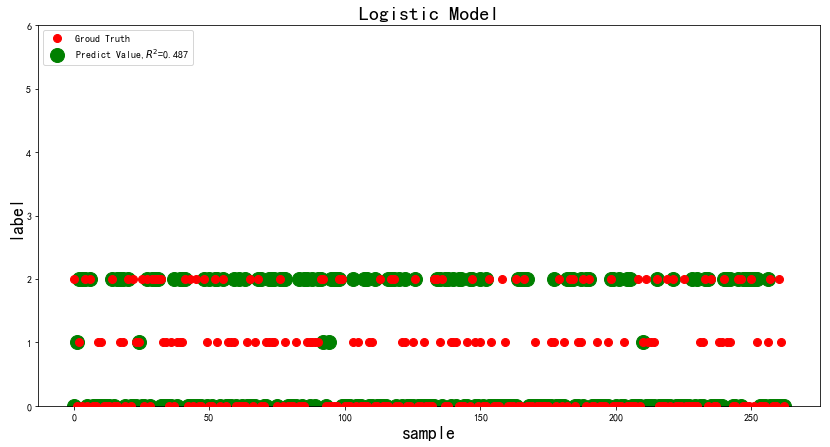

=============Y_test==============
[2 0 1 0 2 0 2 0 0 1 1 0 0 0 2 0 0 1 1 0 2 0 2 1 1 2 0 2 0 2 2 2 2 1 1 0 1
 0 1 1 1 2 0 2 0 2 0 0 2 1 0 0 2 1 0 2 0 1 1 1 0 0 0 0 1 2 0 1 2 0 0 1 1 1
 1 0 2 0 1 0 0 0 1 0 0 0 1 1 1 1 1 2 2 0 0 0 0 0 2 2 0 0 0 1 0 1 0 0 0 1 1
 0 0 2 0 0 0 2 2 0 0 1 1 0 0 1 2 0 0 1 0 0 0 2 2 1 2 0 0 1 1 1 0 0 0 1 0 2
 1 0 1 0 0 2 1 0 0 0 2 1 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 1 1 0 2 0 1 0 2 2
 0 1 1 2 0 2 0 0 1 0 0 0 1 2 0 0 0 0 1 0 0 0 0 2 0 1 2 1 1 1 2 0 0 0 2 0 2
 0 0 0 2 0 0 0 0 0 1 1 2 0 2 0 0 1 1 2 1 1 0 0 2 2 0 0 0 2 0 1 0 0 0 1 2 0
 0 2 1 0]
============Y_predict============
[0 1 2 2 2 0 2 0 0 0 0 0 0 0 2 0 2 2 2 0 2 0 0 0 1 0 0 2 0 2 2 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 0 0 2 0 2 0 2 0 0 0 0 2 2 0 0 2 2
 2 0 2 2 2 0 0 0 0 2 0 2 2 0 2 0 2 2 1 0 1 2 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0
 2 0 0 0 0 2 2 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 0 2 2 0 0 2 2
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2
 0 0 2 0 2 2 0 0 0 0 0

In [24]:
#预测
Y_predict = lr.predict(X_test)
 
#画图对预测值和实际值进行比较
x = range(len(X_test))
plt.figure(figsize=(14,7),facecolor="w")
plt.ylim(0,6)
plt.plot(x,Y_test,"ro",markersize=8,zorder=3,label=u"Groud Truth")
plt.plot(x,Y_predict,"go",markersize=14,zorder=2,label=u"Predict Value,$R^2$=%.3f" %lr.score(X_test,Y_test))
plt.legend(loc="upper left")
plt.xlabel(u"sample",fontsize=18)
plt.ylabel(u"label",fontsize=18)
plt.title(u"Logistic Model",fontsize=20)
plt.show()
 
print("=============Y_test==============")
print(Y_test.ravel())
print("============Y_predict============")
print(Y_predict)

In [1]:
from sklearn import metrics

print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))

NameError: name 'Y_test' is not defined

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Library

In [17]:

#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn import tree
from matplotlib import pyplot as plt




#划分训练集与测试集  随机
target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

bestTestingScore = 0.0
bestDepth = 0
bestriterion = ''

maxdepth = 40
depths = np.arange(2, maxdepth)
criterions = ['gini','entropy']
for criterion in criterions:
    training_scores = []
    testing_scores = []
    for depth in depths:
        clf = tree.DecisionTreeClassifier(criterion = criterion ,max_depth = depth)
        clf.fit(X_train, Y_train)
        trSc = clf.score(X_train, Y_train)
        teSc = clf.score(X_test, Y_test)
        training_scores.append(trSc)
        testing_scores.append(teSc)
        if bestTestingScore< teSc:
            bestTestingScore = teSc
            bestDepth = depth
            bestriterion = criterion
print('best score %.2f' % bestTestingScore)
print('depth %d' % bestDepth)
print('criterion %s' % bestriterion)


best score 0.56
depth 3
criterion gini


In [18]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.svm import SVC


target = 'X'
features = [x for x in df.columns if x not in['ID', 'X']]
X, Y = df[features], df[target]# X = dataSet  and Y =  labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


svm_clf = Pipeline((
                    ('scaler', StandardScaler()),
                   ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
                  )).fit(X_train, Y_train)
print('linear_svc training score:%f' % svm_clf.score(X_train, Y_train))
print('linear_svc testing score:%f' % svm_clf.score(X_test, Y_test))


rbf_kernel_svm_clf = Pipeline((('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 5 )) #当C为0.001 时 预测非1
                               )).fit(X_train, Y_train)
print('rbf_kernel_svc training score:%f' % rbf_kernel_svm_clf.score(X_train, Y_train))
print('rbf_kernel_svc testing score:%f' % rbf_kernel_svm_clf.score(X_test, Y_test))

linear_svc training score:0.553590
linear_svc testing score:0.539419
rbf_kernel_svc training score:0.672216
rbf_kernel_svc testing score:0.531120


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## CCA 特征

In [ ]:
## CCA 数据 没有
"""
CCA_FILES = ["CCA.csv", "DMPCCA.csv", "LDCCA.csv", "LPCCA.csv", "rank-CCA.csv", "semi-CCA.csv"]

for fi in CCA_FILES:
    df = pd.read_csv(open(fi, encoding='utf-8'), skiprows=0)  
    #划分训练集与测试集
    target = 't'
    features = [x for x in df.columns if x not in['t']]
    X, Y = df[features], df[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    lr = LogisticRegressionCV(
        multi_class="multinomial",
        fit_intercept=True,
        Cs=np.logspace(-2,2,20),
        cv=2,
        penalty="l2",
        solver="lbfgs",
        tol=0.01,
        max_iter = 1000,
        class_weight='balanced', 
    )
    re = lr.fit(X_train,Y_train)
    Y_predict = lr.predict(X_test)
    print("===== %s =====" % fi)
    print("训练准确率：", re.score(X_train,Y_train))
    print("预测准确率：", metrics.accuracy_score(Y_test, Y_predict))
    print("精度：", metrics.precision_score(Y_test, Y_predict, average="weighted"))
    print("召回率：", metrics.recall_score(Y_test, Y_predict, average="weighted"))
    print("==========")
"""